In [2]:
# import qiskit_metal
# qiskit_metal.open_docs()
# !pip install manim==0.9.0
# !pip install qiskit[finance]



<h1>The segment below is related to the Baryonic Acoustic Oscillations. I wanted to see how my theory would deal with that. This is work in progress</h1>

<br>
<br>

Current Density is related to the speed of light by Energy Conservation:

$$ \rho=\frac{c^2}{0.776 *G *2 \pi^2R_0^2} $$

# Calculation of the energy available for the Many-Bangs

$$ volume(n, \phi) = \frac{ 2*\pi^{(\frac{n-1}{2})}*\int_{0}^{\pi}{sin(x)^{(n - 2)}dx}}{\Gamma(\frac{n-1}{2})}R^3 $$

#  I will consider the volume of the Visible Universe only (1 radian as opposed to pi radians)

$$ \frac{{P\left( {n,{\text{ }}x} \right)}}{{{n_0}{\text{ }}{T_0}{\text{ }}}}{\text{ }} = {\text{ }}\frac{x}{{{T_0}}}\left( {Mp +Me - Mn} \right){\left( {\frac{n}{{{n_0}}}} \right)^2} + \frac{2}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]{\left( {\frac{n}{{{n_0}}}} \right)^2} + {\text{ }}\gamma [(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^{\gamma  + 1}} $$

$$ \frac{{\varepsilon (n,x)}}{{{n T_0}}} = \frac{1}{{{T_0}}}\left( {Mn(1-x) + x(Mp+Me) } \right)\frac{n}{{{n_0}}} + \frac{3}{5}[{x^{5/3}} + {\text{ }}{(1 - x)^{5/3}}]{(\frac{{2n}}{{{n_0}}})^{2/3}} - [(2\alpha  - 4{\alpha _L})x(1 - x){\text{ }} + {\alpha _L}]\frac{n}{{{n_0}}} + {\text{ }}[(2\eta  - 4{\eta _L})x(1 - x){\text{ }} + {\eta _L}]{(\frac{n}{{{n_0}}})^\gamma } $$



$$ {T_0}{\text{ }} = {\text{ }}{\left( {\frac{{3{\pi ^{\text{2}}}{n_0}}}{2}} \right)^{\frac{2}{3}}}\frac{{{\hbar ^2}}}{{2m}} $$

In [9]:
%matplotlib inline
# !pip install git+https://github.com/scls19fr/pandas-helper-calc
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.fftpack import fft
from parameters import *
from astropy import constants as cc, units as uu
from lib1 import *
from lib2 import *
pd.set_option('display.float_format', lambda x: '%.3e' % x)
from PyAstronomy import *
import itertools
from kneed import KneeLocator
from pandas.plotting._matplotlib.style import get_standard_colors
# Processing Sound Speed on Neutronium.  Data from article was dependent upon energy density MeV/fm3 
# as opposed to seconds.
# https://arxiv.org/pdf/1303.4662.pdf
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

today=4.428e+17
today_y= whatIsY(today*uu.s)
today_y=today_y

defaultsize=[6,4]
colors = get_standard_colors(num_colors=10)

print(alpha, eta, gamma,eta_L,alpha_L, T0.value, n0.value, MN.value, MP.value, ME.value)

6.360873661583572 4.714112355275345 1.1796226399569485 1.7838432750051025 2.4937959551843223 71.62661481234629 0.4341069657774078 939.5654205203889 938.2720881604905 0.5109989499961642


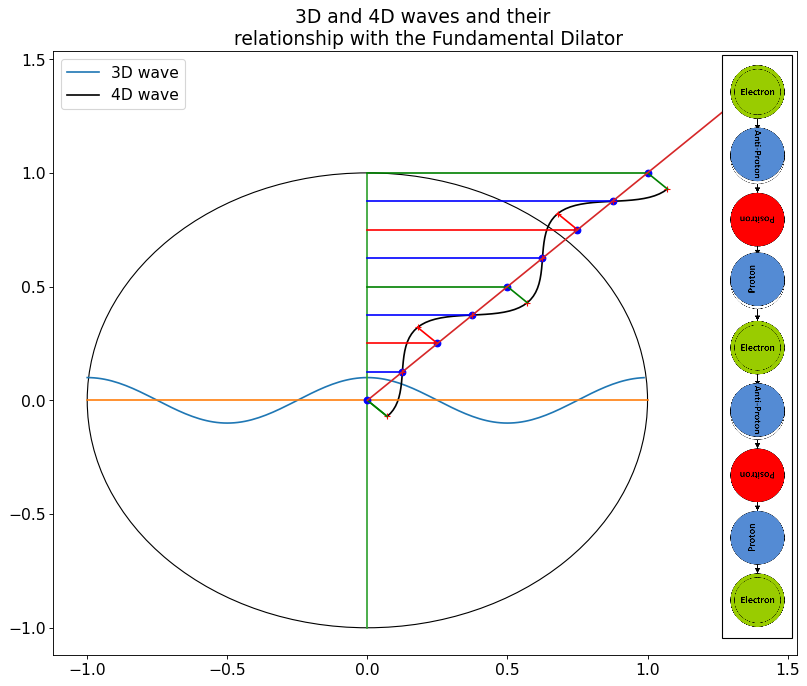

In [79]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=80) # note we must use plt.subplots, not plt.subplot
circle=plt.Circle((0,0),1, fill=False)
#first plots
w= 2*np.pi
x = np.arange(-1,1,0.0125)   # start,stop,step
y = 0.1*np.cos(w*x)
sine= plt.plot(x,y)
# second plots
w= 4*np.pi/np.sqrt(2)
x = np.linspace(0,np.sqrt(2),81)
y = 0.1*np.cos(w*x)
xx = x*np.cos(np.pi/4)+y*np.sin(np.pi/4)
yy = x*np.sin(np.pi/4)-y*np.cos(np.pi/4)
sin1= plt.plot(xx,yy, color="black")
# axes plots
line_=plt.plot([-1,1],[0,0])
line0_=plt.plot([0,0],[-1,1])


line0_=plt.plot([0,xx[0]],[0,yy[0]], color="green")
for i in np.arange(9):
    n=i*10
    v=np.sqrt(2)/2
    line0_=plt.plot(x[n]*v,x[n]*v, color="blue", marker='o')
    line0_=plt.plot(xx[n],yy[n], color="red", marker='+')
#     line1_=plt.plot([x[n]*v,xx[n]],[x[n]*v,yy[n]], color="black")
for i in np.arange(9):
    color="blue"
    if i%4==0:
        color="green"
    if (i+2)%4==0:
        color="red"
    line0_=plt.plot([0,i/8],[i/8,i/8], color=color)
    n=i*10
    line1_=plt.plot([x[n]*v,xx[n]],[x[n]*v,yy[n]], color=color)
line1_=plt.plot([0,np.sqrt(2)],[0,np.sqrt(2)])
ax.add_patch(circle)
# plt.xlabel('x values from 0 to 4pi')  # string must be enclosed with quotes '  '
# plt.ylabel('sin(x) and cos(x)')
plt.title('3D and 4D waves and their \n relationship with the Fundamental Dilator')
plt.legend(['3D wave', '4D wave'])      # legend entries as seperate strings in a list

# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()
# Annotate the 2nd position with another image (a Grace Hopper portrait)
fn = "./img1/NewElectronSingleVertical.png" #get_sample_data("./NewElectronSingleVertical.png", asfileobj=False)
arr_img = plt.imread(fn, format='png')

imagebox = OffsetImage(arr_img, zoom=0.3)
imagebox.image.axes = ax
xy = (0.4, 0.7)
ab = AnnotationBbox(imagebox, xy,
                    xybox=(250., -95.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    )

ax.add_artist(ab)


plt.show
fig.savefig("./FD_4DWave.png")

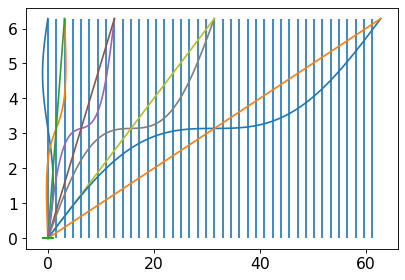

In [142]:
aa=[0.5, 2,  5,10]
y= np.linspace(0, np.pi*2,100)
x=np.sin(y)
ax = plt.plot(x,y)
for a in aa:
    y_prime=y + x*a/(np.sqrt(1+a**2))
    x_prime = a*y - x/(np.sqrt(1+a**2))

    ax.append( plt.plot(x_prime,y_prime) )
    ax.append( plt.plot(a*y,y) )
    ax.append( plt.plot(x,0*x) )
for i in np.arange(4*max(aa)):
    ax.append(plt.vlines(x=i*np.pi/2,ymin=0, ymax=2*np.pi))


In [122]:
y

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

# Locating PreFreezing and PostFreezing times, densities



In [11]:
myU=Universe(eta, alpha, alpha_L, eta_L, T0, gamma, n0,vssquaredpd)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 106
         Function evaluations: 205
y
6.866e-45   2.725e+00
Name: Temperature, dtype: float64 y
1.376e-35   3.437e+03
Name: Temperature, dtype: float64


In [12]:
myU.k0

array([1.22146774e+00, 1.33334958e+00, 2.77144922e-08])

In [13]:
myU.find_k0([1.22146774e+00, 1.33334958e+00, 2.77144922e-08])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 76
         Function evaluations: 149


(array([1.22146774e+00, 1.33334958e+00, 2.77145306e-08]),
 y
 6.866e-45   2.725e+00
 Name: Temperature, dtype: float64,
 y
 1.376e-35   3.437e+03
 Name: Temperature, dtype: float64)

In [14]:
myU.y_Seq

,y,Energy,Pressure,t,radius,Density,Temperature,Radius (lyr),n/n0,$MeV/fm^3$,$N/m^2$,Time (s),Density ($Kg/m^3)$,NeutronDensity ($1/m^3)$,Temperature K,Density (1/fm3),Time (year),Radius (light-seconds),Observable Volume (cubic-light-years),HU Volume (cubic-light-years)
densityBlackholium,8.000e+00,3.289e+02,2.808e+35,0.000e+00,1.333e-05,5.817e+18,1.000e-04,1.333e-05,8.000e+00,3.289e+02,2.808e+35,0.000e+00,5.817e+18,3.473e+45,1.000e-04,3.473e+00,0.000e+00,4.208e+02,9.932e-15,4.680e-14
densityNeutronium,4.000e+00,1.130e+02,4.826e+34,1.094e+02,1.680e-05,2.908e+18,1.000e-04,1.680e-05,4.000e+00,1.130e+02,4.826e+34,1.094e+02,2.908e+18,1.736e+45,1.000e-04,1.736e+00,3.466e-06,5.302e+02,1.986e-14,9.360e-14
densityAtPreFreezing,3.636e+00,9.766e+01,3.772e+34,1.265e+02,1.734e-05,2.644e+18,1.000e-04,1.734e-05,3.636e+00,9.766e+01,3.772e+34,1.265e+02,2.644e+18,1.579e+45,1.000e-04,1.579e+00,4.008e-06,5.473e+02,2.185e-14,1.030e-13
densityAtFreezing,4.040e-01,8.983e+00,1.246e+32,7.176e+02,3.607e-05,2.938e+17,1.000e-04,3.607e-05,4.040e-01,8.983e+00,1.246e+32,7.176e+02,2.938e+17,1.754e+44,1.000e-04,1.754e-01,2.274e-05,1.138e+03,1.966e-13,9.267e-13
densityPreBigBang,8.951e-07,5.933e-03,2.431e+23,8.691e+04,2.767e-03,6.508e+11,1.000e-04,2.767e-03,8.951e-07,5.933e-03,2.431e+23,8.691e+04,6.508e+11,3.885e+38,1.000e-04,3.885e-07,2.754e-03,8.733e+04,8.877e-08,4.183e-07
densityPostBigBang,2.186e-08,5.296e-04,5.349e+20,3.006e+05,9.538e-03,1.589e+10,3.719e+09,9.538e-03,2.186e-08,5.296e-04,5.349e+20,3.006e+05,1.589e+10,9.490e+36,3.719e+09,9.490e-09,9.525e-03,3.010e+05,3.635e-06,1.713e-05
densityAtTransparency,1.376e-35,3.917e-22,2.499e-25,3.512e+14,1.113e+07,1.000e-17,3.437e+03,1.113e+07,1.376e-35,3.917e-22,2.499e-25,3.512e+14,1.000e-17,5.973e+09,3.437e+03,5.973e-36,1.113e+07,3.512e+14,5.775e+21,2.721e+22
densityToday,6.866e-45,2.464e-28,7.846e-41,4.428e+17,1.403e+10,4.992e-27,2.725e+00,1.403e+10,6.866e-45,2.464e-28,7.846e-41,4.428e+17,4.992e-27,2.981e+00,2.725e+00,2.981e-45,1.403e+10,4.428e+17,1.157e+31,5.453e+31


In [15]:
myU.df.Temperature.max()/1e9


3.92086471624053

In [16]:
# This simple optimization recovered both the current temperature (2.725 Kelvin) and the
# temperature at transparency (3487) for a redshift of 3487/2.725=1279
myU.z_transparency, 3443/2.734, 3443/2.725

(1259.9608061095525, 1259.32699341624, 1263.48623853211)

In [17]:
myU.createReport(filename="./AllUniverse.xls")


 Gamma Fitting 
 Plasma Gamma = 1.2214677421671327 
 Hydrogen Gamma = 1.3333495814857037 
 Adiabatic Boundary = 20151171264.34168 = kg / m3 
 Adiabatic Boundary_y = 2.771453056260955e-08 
 Adiabatic Boundary_t = 277684.0954558234 = seconds 



 Initial Universe Properties 
 Initial 4D Radius of the Universe (light-seconds) =  420.8052555953841 =ls 
 Mass of the Observable Universe =  4.891892875630747e+52 kg = kg 
 Mass of the Hyperspherical Universe =  2.3052502080344712e+53 kg = kg 



 General Properties 
 EnergyPerSupernova = 1E51 =ergs 
 Cell Length (m) =  1.3206905848167287e-15 =m 
 Current Density ($kg/m^3$) =  4.992331130380315e-27 = kg / m3 
 Current Density ($1/m^3$) =  2.980625212865835 =1/m3 



 Current Universe Properties 
 Current 4D Radius of the Universe (light-years) =  14030000000.0 =lyr 
 Current Density ($kg/m^3$) =  4.992331130380315e-27 = kg / m3 
 Current Density ($1/m^3$) =  2.980625212865835 =1/m3 



 Observable Universe Properties 
 Initial Volume Observabl

/home/mp74207/Dropbox/GitHub/AAA_CMB_HU/lib1.py:284: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  self.x_Seq.to_excel(filename)


In [18]:
myU.x_Seq

,n/n0,$MeV/fm^3$,$N/m^2$,Time (s),Radius (lyr),Density ($Kg/m^3)$,Temperature K,Time (year),Radius (light-seconds),Observable Volume (cubic-light-years),HU Volume (cubic-light-years),NeutronDensity ($1/m^3)$
Blackholium,8.000e+00,3.289e+02,2.808e+35,0.000e+00,1.333e-05,5.817e+18,1.000e-04,0.000e+00,4.208e+02,9.932e-15,4.680e-14,3.473e+45
Neutronium,4.000e+00,1.130e+02,4.826e+34,1.094e+02,1.680e-05,2.908e+18,1.000e-04,3.466e-06,5.302e+02,1.986e-14,9.360e-14,1.736e+45
PreFreezing,3.636e+00,9.766e+01,3.772e+34,1.265e+02,1.734e-05,2.644e+18,1.000e-04,4.008e-06,5.473e+02,2.185e-14,1.030e-13,1.579e+45
Freezing,4.040e-01,8.983e+00,1.246e+32,7.176e+02,3.607e-05,2.938e+17,1.000e-04,2.274e-05,1.138e+03,1.966e-13,9.267e-13,1.754e+44
PreBigBang,8.951e-07,5.933e-03,2.431e+23,8.691e+04,2.767e-03,6.508e+11,1.000e-04,2.754e-03,8.733e+04,8.877e-08,4.183e-07,3.885e+38
PostBigBang,2.186e-08,5.296e-04,5.349e+20,3.006e+05,9.538e-03,1.589e+10,3.719e+09,9.525e-03,3.010e+05,3.635e-06,1.713e-05,9.490e+36
Transparency,1.376e-35,3.917e-22,2.499e-25,3.512e+14,1.113e+07,1.000e-17,3.437e+03,1.113e+07,3.512e+14,5.775e+21,2.721e+22,5.973e+09
Today,6.866e-45,2.464e-28,7.846e-41,4.428e+17,1.403e+10,4.992e-27,2.725e+00,1.403e+10,4.428e+17,1.157e+31,5.453e+31,2.981e+00


# PLOTS

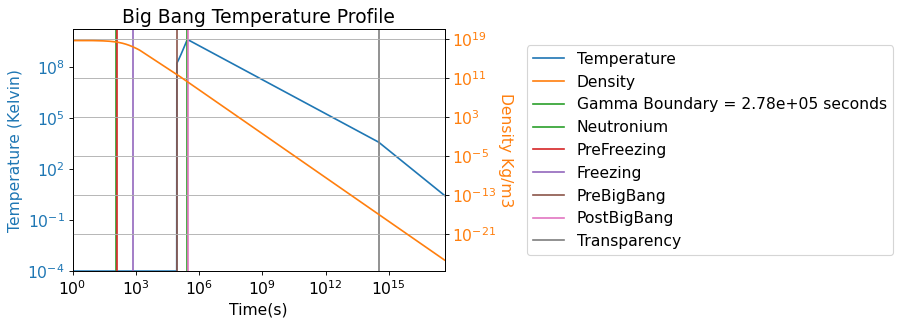

In [19]:
# Plot C

tmin=1E0
tmax=today
dmin = 1E-27
dmax = 1E20

colors = get_standard_colors(num_colors=10)

plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'

x_Seq=myU.y_Seq.iloc[1:-1:]
ax=myU.df.plot(x="t", y="Temperature", logx=True, logy=True, legend=False, color=colors[0])
partOfLegend =((x_Seq.t-tmin)*(x_Seq.t-tmax)<=0)
ax.set_xlim(tmin,tmax)
ax.set_ylim(1E-4,1.5E10)
ax.set_title("Big Bang Temperature Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Temperature (Kelvin)", c=colors[0])
ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, legend=False, ax=ax1, color=colors[1])
# ax1.set_ylim(1E-2,None)
ax1.set_ylabel("Density Kg/m3",color=colors[1], rotation=270,labelpad=15)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xnames=[]
xcoords =[]
for x, t, includeit in zip(x_Seq.index, x_Seq.t, partOfLegend):
    if includeit:
        xnames.append(x.replace("density","").replace("At",""))
        xcoords.append(t)
    
# colors for the lines
ax.axvline(label="Density", c=colors[1])
ax.axvline(myU.boundaryadiabatic_t, label="Gamma Boundary = {:.2e} seconds".format(np.round(myU.boundaryadiabatic_t,0)), c=colors[2])

for xc,c, name in zip(xcoords,colors[2:len(xnames)+2], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

plt.grid(True)
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
plt.savefig(imgAddress + "TemperatureProfileNotLog.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

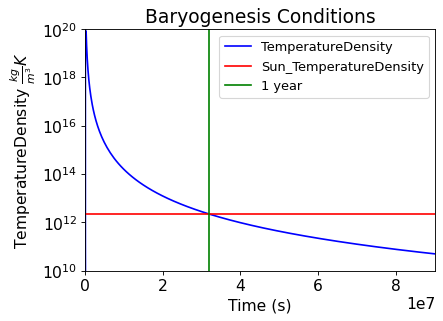

In [20]:
# Plot 7
# myU.df["TemperatureDensity"]= myU.df.Density*myU.df.Temperature
ax = myU.df.plot(x="t", y="TemperatureDensity"  , label="TemperatureDensity", color="b", logx=False, logy=True)
sundensity = 1.5E5 # kg/m^3
suntemperature = 1.5E7 # Kelvin
sunTemperatureDensity = 2.25E+12 # kg/m^3 Kelvin
ax.axhline(sunTemperatureDensity, c="red", label="Sun_TemperatureDensity")
ax.axvline(3.20E7, c="green", label="1 year")
ax.set_ylim(1,None)
ax.set_ylim(1E10,1E20)
ax.set_xlim(0,myU.timePostBigBang*300)
ax.set_xlabel("Time (s)")    
ax.set_title("Baryogenesis Conditions") 
ax.set_ylabel('TemperatureDensity $\\frac{kg}{m^3}K$',color="black") 
plt.subplots_adjust(left=0.17)
# plt.subplots_adjust(bottom=-0.1)
plt.rcParams['legend.fontsize'] = 'small'
# ax.legend= ['TemperatureDensity', "Sun_TemperatureDensity"]
plt.legend()
plt.savefig(imgAddress + "BB_PressureTemperatureLongProfile.png")

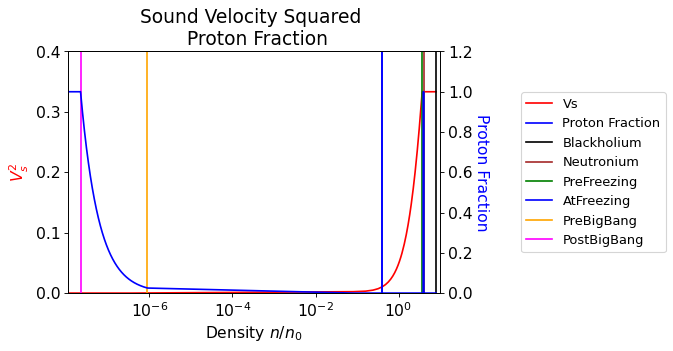

In [21]:
# Plot A

################################
ax=myU.df.plot(x="y",y="Vs", c="r", legend=False)
ax.set_title("Sound Velocity Squared \n Proton Fraction")
ax.set_ylabel("$V_s^2$", c="r")
ax.set_xlabel('Density $n/n_0$')
################################
ax1 = plt.twinx(ax)
myU.df.plot(x="y", y="ProtonFraction", ax=ax1, c="b", legend=False)
ax1.set_ylabel("Proton Fraction", rotation=270, labelpad=15, c="b")
ax.set_ylim(0,np.max(myU.df.Vs)*1.2)
ax1.set_ylim(0,np.max(myU.df.ProtonFraction)*1.2)

ax.axvline(x=myU.densityAtFreezing, label="Proton Fraction", c="blue")
ax.axvline(x=myU.densityBlackholium, label="Blackholium", c="black")
ax.axvline(x=myU.densityNeutronium, label="Neutronium", c="brown")
ax.axvline(x=myU.densityAtPreFreezing, label="PreFreezing", c="green")
ax.axvline(x=myU.densityAtFreezing, label="AtFreezing", c="blue")
ax.axvline(x=myU.densityPreBigBang, label="PreBigBang", c="orange")
ax.axvline(x=myU.densityPostBigBang, label="PostBigBang", c="magenta")

ax.set_xscale('log')
# ax.set_xlim([0.5*densityAtFreezing, 10])
ax.set_xlim([0.5*myU.densityPostBigBang, 10])
# ax.set_xlim([0.5*today_y, 10])
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

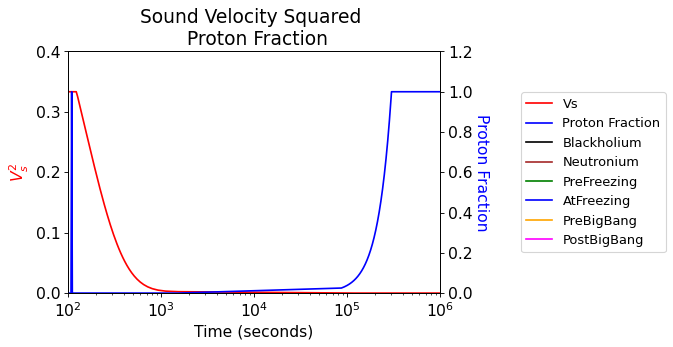

In [22]:
# Plot AA

################################
ax=myU.df.plot(x="t",y="Vs", c="r", legend=False)
ax.set_title("Sound Velocity Squared \n Proton Fraction")
ax.set_ylabel("$V_s^2$", c="r")
ax.set_xlabel('Time (seconds)')
################################
ax1 = plt.twinx(ax)
myU.df.plot(x="t", y="ProtonFraction", ax=ax1, c="b", legend=False)
ax1.set_ylabel("Proton Fraction", rotation=270, labelpad=15, c="b")
ax.set_ylim(0,np.max(myU.df.Vs)*1.2)
ax1.set_ylim(0,np.max(myU.df.ProtonFraction)*1.2)

ax.axvline(x=myU.densityAtFreezing, label="Proton Fraction", c="blue")
ax.axvline(x=myU.densityBlackholium, label="Blackholium", c="black")
ax.axvline(x=myU.densityNeutronium, label="Neutronium", c="brown")
ax.axvline(x=myU.densityAtPreFreezing, label="PreFreezing", c="green")
ax.axvline(x=myU.densityAtFreezing, label="AtFreezing", c="blue")
ax.axvline(x=myU.densityPreBigBang, label="PreBigBang", c="orange")
ax.axvline(x=myU.densityPostBigBang, label="PostBigBang", c="magenta")

ax.set_xscale('log')
# ax.set_xlim([0.5*densityAtFreezing, 10])
ax.set_xlim([100, 1E6])
# ax.set_xlim([0.5*today_y, 10])
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [23]:
# myU.y_Seq.loc["densityAtPreFreezing"].t - myU.y_Seq.loc["densityAtFreezing"].t
# (myU.y_Seq.loc["densityPreBigBang"].t - myU.y_Seq.loc["densityPostBigBang"].t)/ myU.y_Seq.loc["densityPostBigBang"].t
myU.y_Seq.loc["densityAtPreFreezing"].t , myU.y_Seq.loc["densityAtFreezing"].t, myU.y_Seq.loc["densityPreBigBang"].t , myU.y_Seq.loc["densityPostBigBang"].t
# myU.y_Seq

(126.49043612912284, 717.6149119590904, 86908.77835075083, 300576.0413556371)

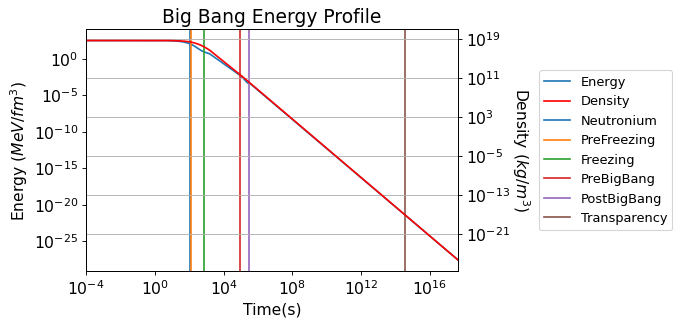

In [24]:
# Plot B

ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,today)
# ax.set_ylim(None,1E6)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")


ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", ax=ax1, color="r",logx=True, logy=True, legend=False)
ax1.set_ylabel("Density ($kg/m^3$)", rotation=270, labelpad=20)
ax.axvline(label="Density", c="r")
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines

for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################


plt.grid(True)
plt.savefig(imgAddress + "EnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

Series([], Name: Temperature, dtype: float64)

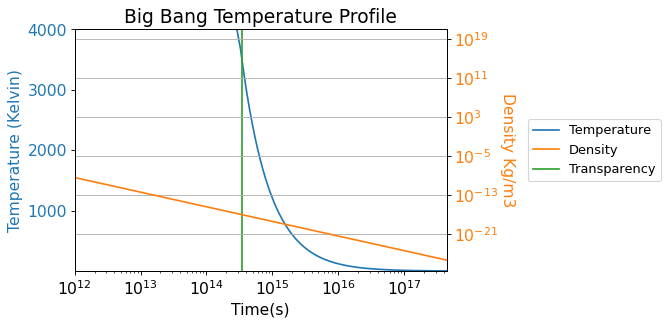

In [25]:
# Plot C1
tmin=1E12
x_Seq=myU.y_Seq.iloc[1:-1:]
ax=myU.df.plot(x="t", y="Temperature", logx=True, logy=False, legend=False, color=colors[0])
partOfLegend =((x_Seq.t-tmin)*(x_Seq.t-tmax)<=0)
ax.set_xlim(tmin,tmax)
ax.set_ylim(1E-4,4000)
ax.set_title("Big Bang Temperature Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Temperature (Kelvin)", c=colors[0])
ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, legend=False, ax=ax1, color=colors[1])
# ax1.set_ylim(1E-2,None)
ax1.set_ylabel("Density Kg/m3",color=colors[1], rotation=270,labelpad=15)

##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xnames=[]
xcoords =[]
for x, t, includeit in zip(x_Seq.index, x_Seq.t, partOfLegend):
    if includeit:
        xnames.append(x.replace("density","").replace("At",""))
        xcoords.append(t)
    
# colors for the lines
ax.axvline(label="Density", c=colors[1])


for xc,c, name in zip(xcoords,colors[2:len(xnames)+2], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

plt.grid(True)
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
plt.savefig(imgAddress + "TemperatureProfileNotLog.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
myU.df.Temperature[-1:]

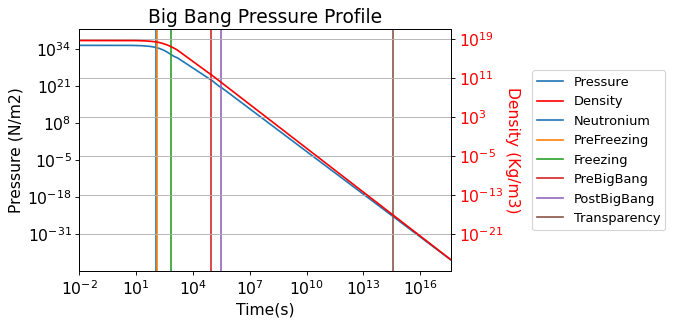

In [26]:
ax=myU.df.plot(x="t", y="Pressure", logx=True, logy=True)
ax.set_xlim(1E-2,today)
ax.set_ylim(None,1E41)
ax.set_title("Big Bang Pressure Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Pressure (N/m2)")
ax1=plt.twinx(ax)


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.20, 0.5))
##########################################################

    
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r", legend=False)

ax1.set_ylabel("Density (Kg/m3)",color="r")

# colors for the lines
ax1.set_ylabel("Density (Kg/m3)", rotation=270,labelpad=15)
for tl in ax1.get_yticklabels():
    tl.set_color('r')
plt.grid(axis='y')
plt.savefig(imgAddress + "PressureProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

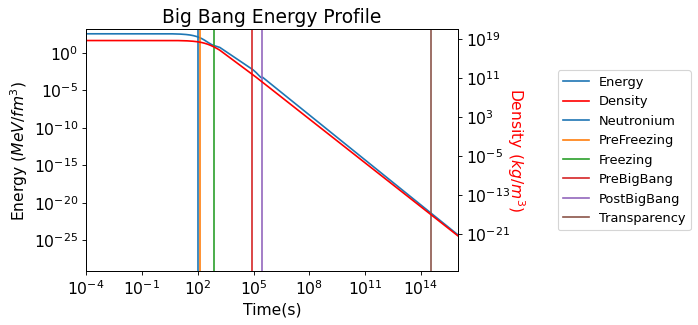

In [27]:
ax=myU.df.plot(x="t", y="Energy", logx=True, logy=True)
ax.set_xlim(1E-4,1E16)
ax.set_ylim(None,1.2E3)
ax.set_title("Big Bang Energy Profile")
ax.set_xlabel("Time(s)")
ax.set_ylabel("Energy ($MeV/fm^3$)")

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Density", logx=True, logy=True, ax=ax1, color="r",legend=False)

# colors for the lines
ax1.set_ylabel("Density ($kg/m^3$)", color="r", rotation=270,labelpad=15)
##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords,colors, xnames):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
##########################################################


plt.savefig(imgAddress + "UniverseEnergyProfile.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

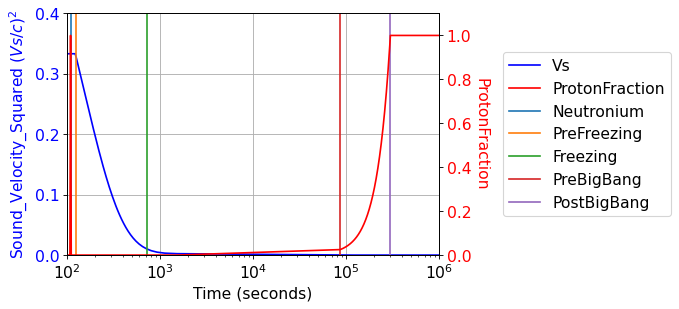

In [28]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "Vs",logx=True, color="b", legend=False)

ax.set_xlim(1E2,1E6)
ax.set_ylim(0,0.4)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Sound_Velocity_Squared $(Vs/c)^2$", c="blue")
ax.grid(True)



##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="ProtonFraction", c="r")
for xc,c, name in zip(xcoords[0:5],colors[0:5], xnames[0:5]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
##########################################################



ax2=plt.twinx(ax)    
myU.df.plot(x="t", y="ProtonFraction", ax=ax2,logx=True, color="r", legend=False)
ax2.set_ylim(0,1.1)
ax2.set_ylabel("ProtonFraction",color="r", rotation=270, labelpad=15)
ax2.set_xlim(1E2,1E6)

for tl in ax.get_yticklabels():
    tl.set_color('blue')

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig(imgAddress + "NeutroniumSpeedOfSoundVersusDecay.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


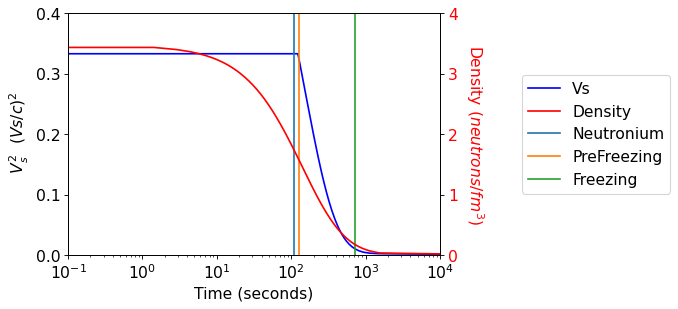

In [29]:
plt.rcParams['figure.figsize'] = defaultsize
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'medium'


ax=myU.df.plot(x="t", y= "Vs",logx=True, color="b")

ax.set_xlim(1E0,1E4)
ax.set_ylim(0,0.4)

ax.set_xlabel("Time (seconds)")
ax.set_ylabel(" $V_s^2$  $(Vs/c)^2$")
ax.legend(loc="center")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[1:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
ax.axvline(label="Density", c="r")
for xc,c, name in zip(xcoords[0:3],colors[0:3], xnames[0:3]):
    ax.axvline(x=xc, label=name, c=c)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################

ax2=plt.twinx(ax)    
myU.df["n*n0"]= [(x*n0).to("1/fm**3").value for x in myU.df.y]
myU.df.plot(x="t", y="n*n0", ax=ax2,logx=True,logy=False, color="r", legend=False)
ax2.set_ylim(0,4)
ax2.set_ylabel("Density ($neutrons/fm^3$)",color="r", rotation=270, labelpad=25)
ax2.set_xlim(1E-1,1E4)

for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.savefig(imgAddress + "NeutroniumSpeedOfSound.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

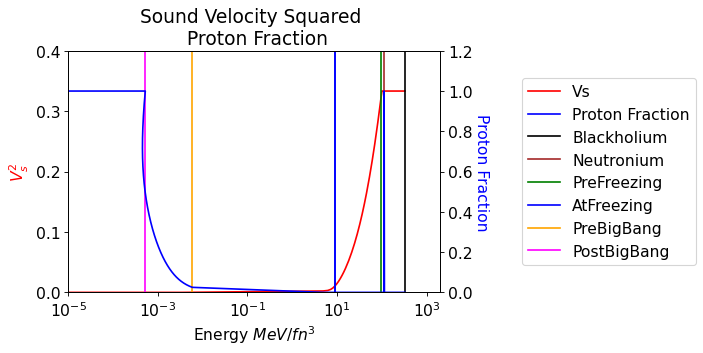

In [30]:
ax=myU.df.plot(x="Energy",y="Vs", c="r", legend=False)
ax.set_title("Sound Velocity Squared \n Proton Fraction")
ax.set_ylabel("$V_s^2$", c="r")
ax.set_xlabel('Energy $MeV/fn^3$')
################################
ax1 = plt.twinx(ax)
myU.df.plot(x="Energy", y="ProtonFraction", ax=ax1, c="b", legend=False)
ax1.set_ylabel("Proton Fraction", rotation=270, labelpad=15, c="b")
ax.set_ylim(0,np.max(myU.df.Vs)*1.2)
ax1.set_ylim(0,np.max(myU.df.ProtonFraction)*1.2)

ax.axvline(x=myU.y_Seq.loc["densityAtFreezing", "Energy"], label="Proton Fraction", c="blue")
ax.axvline(x=myU.y_Seq.loc["densityBlackholium","Energy"], label="Blackholium", c="black")
ax.axvline(x=myU.y_Seq.loc["densityNeutronium","Energy"], label="Neutronium", c="brown")
ax.axvline(x=myU.y_Seq.loc["densityAtPreFreezing","Energy"], label="PreFreezing", c="green")
ax.axvline(x=myU.y_Seq.loc["densityAtFreezing","Energy"], label="AtFreezing", c="blue")
ax.axvline(x=myU.y_Seq.loc["densityPreBigBang","Energy"], label="PreBigBang", c="orange")
ax.axvline(x=myU.y_Seq.loc["densityPostBigBang","Energy"], label="PostBigBang", c="magenta")

ax.set_xscale('log')
ax.set_xlim([1E-5, 2E3])
# ax.set_xlim([0.5*densityAtFreezing, 10])
# ax.set_xlim([0.5*densityPostBigBang, 10])
# ax.set_xlim([0.5*today_y, 10])
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

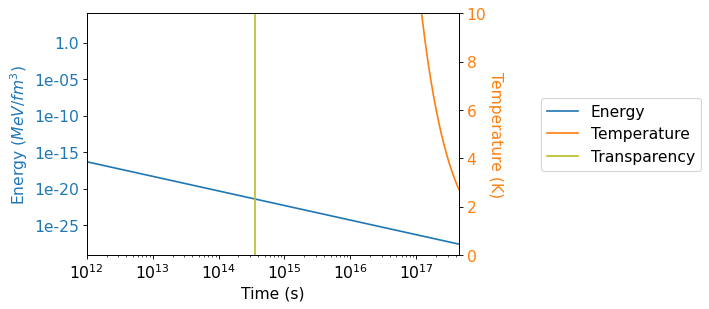

In [31]:
# Plot 6

import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

ax=myU.df.plot(x="t", y="Energy", color=colors[0], logx=True, logy=True, legend=False)
ax.set_xlim(tmin,today)
# ax.set_ylim(1E-4, 1E5)

ax.set_xlabel("Time (s)")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[0:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
# ax.axvline(label="Energy", c=colors[0])
# ax.axvline(label="Temperature", c=colors[1])


fmt = lambda x, pos: '{}'.format(x, pos)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Temperature", ax=ax1, color=colors[1],logx=True, logy=False, legend=False)
# ax1.set_xlim(1E2,1E5)
ax1.set_ylim(0,10)
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
ax.set_ylabel("Energy ($MeV/fm^3$)", color=colors[0],)
ax1.set_ylabel("Temperature (K)", color=colors[1], rotation=270,labelpad=15)
ax.axvline(label="Temperature", c=colors[1])
for xc,c, name in zip(xcoords,colors[2:], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)

lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################
plt.savefig(imgAddress + "EnergyTemperature.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


<ipython-input-32-791c00ad9c6e>:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0,1200)


Series([], Name: Temperature, dtype: float64)

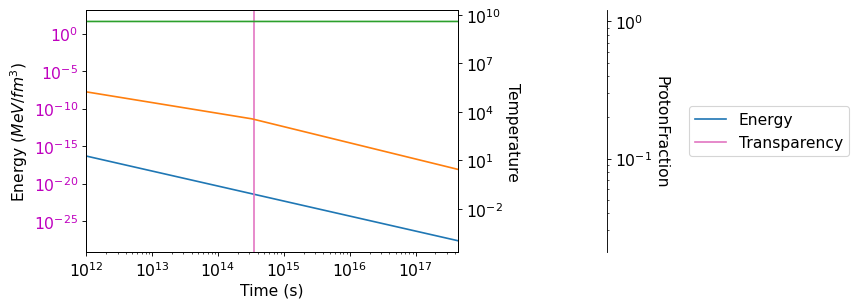

In [32]:
# Plot 6
spacing=.4
cols=['Energy','Temperature', 'ProtonFraction']
data =myU.df.copy()
data.index = data.t
# ax = plot_multi( myU.df,cols=['Temperature', 'Energy','Proton_Fraction'], spacing=.3)



# First axis
ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0],logx=True, logy=True )
ax.set_ylabel(ylabel=cols[0])
ax.set_ylim(0,1200)
ax.set_xlim(tmin,today)
lines, labels = ax.get_legend_handles_labels()


for xc,c, name in zip(xcoords,colors, xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)



for n in range(1, len(cols)):
    # Multiple y-axes
    ax_new = ax.twinx()
    ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
    data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], logx=True, logy=True)
    ax_new.set_ylabel(ylabel=cols[n], rotation=270, labelpad=15)

    # Proper legend position
    line, label = ax_new.get_legend_handles_labels()
    lines += line
    labels += label

ax.set_ylabel("Energy ($MeV/fm^3$)")
ax.set_xlabel("Time (s)")    
    
# ax.legend(lines, labels, loc=4)
lgd=ax.legend(loc='center left', bbox_to_anchor=(1.6, 0.5))

for tl in ax.get_yticklabels():
    tl.set_color('m')
    
myU.df.Temperature[-1:]

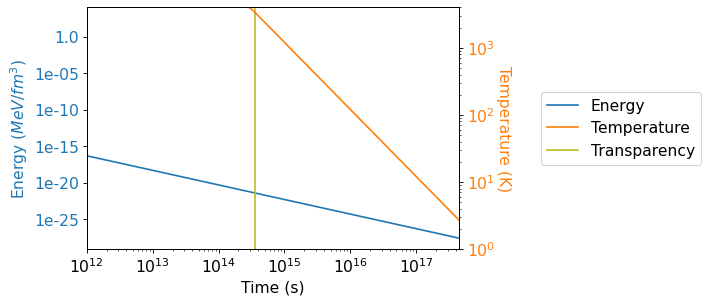

In [33]:
# Plot 6

import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter

ax=myU.df.plot(x="t", y="Energy", color=colors[0], logx=True, logy=True, legend=False)
ax.set_xlim(tmin,today)
# ax.set_ylim(1E-4, 1E5)

ax.set_xlabel("Time (s)")


##########################################################
# x coordinates for the lines
x_Seq=myU.y_Seq.iloc[0:-1:]
xcoords = x_Seq.t
xnames = [x.replace("density","").replace("At","") for x in x_Seq.index]
# colors for the lines
# ax.axvline(label="Energy", c=colors[0])
# ax.axvline(label="Temperature", c=colors[1])


fmt = lambda x, pos: '{}'.format(x, pos)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(fmt))

ax1=plt.twinx(ax)
myU.df.plot(x="t", y="Temperature", ax=ax1, color=colors[1],logx=True, logy=True, legend=False)
# ax1.set_xlim(1E2,1E5)
ax1.set_ylim(1E0,4000)
for tl in ax.get_yticklabels():
    tl.set_color(colors[0])
for tl in ax1.get_yticklabels():
    tl.set_color(colors[1])
ax.set_ylabel("Energy ($MeV/fm^3$)", color=colors[0],)
ax1.set_ylabel("Temperature (K)", color=colors[1], rotation=270,labelpad=15)
ax.axvline(label="Temperature", c=colors[1])
for xc,c, name in zip(xcoords,colors[2:], xnames):
    if (tmin <= xc):
        ax.axvline(x=xc, label=name, c=c)

lgd=ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
##########################################################
plt.savefig(imgAddress + "EnergyTemperature.png", bbox_extra_artists=(lgd,), bbox_inches='tight')


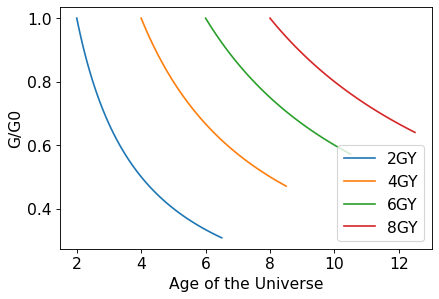

In [34]:
# Plot D

fig, ax = plt.subplots()
for initialT in range(2,10,2):
    t=np.linspace(initialT, initialT+4.5,100)
    GG=initialT/t
    ax.plot(t,GG,label=str(initialT) + "GY")
    ax.legend()
    ax.set_ylabel("G/G0")
    ax.set_xlabel("Age of the Universe")
plt.savefig(imgAddress + "G_Decay.png", dpi=300)

# Baryonic Acoustic Oscillations
<div class="csl-entry">Alcaniz, J. S., Carvalho, G. C., Bernui, A., Carvalho, J. C., &#38; Benetti, M. (n.d.). <i>Measuring baryon acoustic oscillations with angular two-point correlation function</i>.</div>
<div class="csl-entry"><i>Transmission of Sound Waves in Gases at Low Pressures</i>. (n.d.).</div>
<div class="csl-entry">Melia, F. (2021). The anomalous 21-cm absorption at high redshifts. <i>European Physical Journal C</i>, <i>81</i>(3). https://doi.org/10.1140/EPJC/S10052-021-09029-4</div>

In [35]:
def dofz(z):
    return RR*z/(1+z)
BAO_angle= 2.5*np.pi/180 # subtended angle
r_BAO=130*uu.Mpc
QQ = (r_BAO/RR/BAO_angle).si.value
RR.to(uu.lyr), r_BAO.to(uu.lyr), BAO_angle, QQ

(<Quantity 1.403e+10 lyr>,
 <Quantity 4.24003291e+08 lyr>,
 0.04363323129985824,
 0.6926186479195257)

In [36]:
HU_r_BAO= dofz(1262)*BAO_angle
HU_r_BAO.to(uu.Mpc)

<Quantity 187.54486449 Mpc>

In [37]:
dofz(1262)

<Quantity 1.40188915e+10 9.46073e+15 m>

In [38]:
(14.3E3*uu.Mpc).to(uu.lyr)

<Quantity 4.6640362e+10 lyr>

In [39]:
T0

<Quantity 71.62661481 MeV>

In [40]:
MW_mass = cc.M_sun*1.5E12 
R0_GLY= 14.03E9*uu.lyr
vmax=210*uu.km/uu.s
# vmax= (cc.c*dmax/R0_GLY).si
dmax=1e5*uu.lyr
alpha1= (MW_mass/vmax**3).si; alpha1


<Quantity 3.22061851e+26 kg s3 / m3>

In [41]:
alpha= (R0_GLY/2/cc.G/cc.c).si

In [42]:
alpha

<Quantity 3.31685067e+27 kg s3 / m3>

In [43]:
(vmax/cc.G).si

<Quantity 3.14639738e+15 kg s / m2>

In [44]:
import pandas as pd
import numpy as np
TullyData2 = pd.read_excel("./PG_data/GHASP_Galaxies_1.xls",sheet_name="Sheet2")
TullyData2["log_V_RC_Max"]=np.log10(TullyData2.V_RC_Max)
TullyData2["log_V_Model_R25"]=np.log10(TullyData2.V_Model_R25)
TullyData2["log_V_TF_max"]=np.log10(TullyData2.V_TF_max)
TullyData2["ApparentLuminosity"]= 2.512**TullyData2.MK
TullyData2

,UGC,MH,MK,V_RC_Max,V_Model_R25,V_TF_max,Flag,log_V_RC_Max,log_V_Model_R25,log_V_TF_max,ApparentLuminosity
0,89,-2.490e+01,-2.520e+01,343,340,343,F–,2.535e+00,2.531e+00,2.535e+00,8.308e-11
1,94,-2.316e+01,-2.340e+01,209,210,209,F,2.320e+00,2.322e+00,2.320e+00,4.361e-10
2,763,-2.054e+01,-2.074e+01,104,95,104,F+,2.017e+00,1.978e+00,2.017e+00,5.054e-09
3,1256,-2.030e+01,-2.043e+01,105,119,105,R+,2.021e+00,2.076e+00,2.021e+00,6.724e-09
4,1317,-2.444e+01,-2.469e+01,205,208,205,F,2.312e+00,2.318e+00,2.312e+00,1.329e-10
...,...,...,...,...,...,...,...,...,...,...,...
78,11914,-2.380e+01,-2.403e+01,285,283,283,2D–,2.455e+00,2.452e+00,2.452e+00,2.441e-10
79,11951,-2.109e+01,-2.129e+01,106,102,106,1R+,2.025e+00,2.009e+00,2.025e+00,3.045e-09
80,12276,-2.355e+01,-2.378e+01,94,93,94,2F+,1.973e+00,1.968e+00,1.973e+00,3.073e-10
81,12343,-2.374e+01,-2.396e+01,221,243,221,2F+,2.344e+00,2.386e+00,2.344e+00,2.603e-10


In [45]:
TullyData1 = pd.read_excel("./PG_data/GHASP_Galaxies_1.xls",sheet_name="Sheet1")
TullyData1.UGC
TullyData1.index = TullyData1.UGC
TullyData2.index = TullyData2.UGC
for a in ["MH", "MK", "V_RC_Max", "V_Model_R25", "V_TF_max", "Flag", "log_V_RC_Max", "log_V_Model_R25", "log_V_TF_max"]:
    TullyData1[a]=0.0
    for b in TullyData1.UGC:
        TullyData1.loc[b,a]=TullyData2.loc[b,a]
TullyData1

,UGC,Radius,B_V,gamma_B_and_J,gamma_BE,gamma_PO,log_MB_and_J,log_M_BE,log_M_PO,log_M_gas,log_M_bar,MH,MK,V_RC_Max,V_Model_R25,V_TF_max,Flag,log_V_RC_Max,log_V_Model_R25,log_V_TF_max
UGC,,,,,,,,,,,,,,,,,,,,
7831,7831,1.260e+00,6.600e-01,5.500e-01,7.600e-01,8.500e-01,9.410e+00,9.550e+00,9.600e+00,8.530e+00,9.590e+00,-2.061e+01,-2.077e+01,9.200e+01,9.800e+01,9.800e+01,R–,1.964e+00,1.991e+00,1.991e+00
763,763,2.000e+00,7.700e-01,6.500e-01,7.900e-01,1.030e+00,9.470e+00,9.560e+00,9.670e+00,9.450e+00,9.810e+00,-2.054e+01,-2.074e+01,1.040e+02,9.500e+01,1.040e+02,F+,2.017e+00,1.978e+00,2.017e+00
7861,7861,2.900e+00,7.100e-01,5.900e-01,7.800e-01,9.300e-01,9.310e+00,9.430e+00,9.510e+00,8.860e+00,9.530e+00,-2.021e+01,-2.044e+01,5.000e+01,3.300e+01,5.000e+01,R,1.699e+00,1.519e+00,1.699e+00
9179,9179,3.170e+00,6.300e-01,5.200e-01,7.600e-01,8.100e-01,8.560e+00,8.720e+00,8.750e+00,8.960e+00,9.160e+00,-1.860e+01,-1.870e+01,1.110e+02,1.050e+02,1.110e+02,F+,2.045e+00,2.021e+00,2.045e+00
7045,7045,3.480e+00,1.660e+00,2.450e+00,1.040e+00,4.540e+00,1.063e+01,1.026e+01,1.090e+01,8.930e+00,1.028e+01,-2.198e+01,-2.219e+01,1.600e+02,1.560e+02,1.600e+02,R+,2.204e+00,2.193e+00,2.204e+00
9866,9866,3.570e+00,8.000e-01,6.800e-01,8.000e-01,1.080e+00,9.200e+00,9.270e+00,9.400e+00,7.930e+00,9.290e+00,-1.984e+01,-2.002e+01,1.140e+02,1.150e+02,1.150e+02,R–,2.057e+00,2.061e+00,2.061e+00
4325,4325,3.800e+00,8.700e-01,7.500e-01,8.200e-01,1.210e+00,7.920e+00,7.960e+00,8.130e+00,8.910e+00,8.960e+00,-1.651e+01,-1.670e+01,8.500e+01,8.800e+01,8.800e+01,R–,1.929e+00,1.944e+00,1.944e+00
5721,5721,4.000e+00,6.300e-01,5.200e-01,7.600e-01,8.100e-01,8.290e+00,8.450e+00,8.480e+00,8.730e+00,8.910e+00,-1.787e+01,-1.802e+01,9.900e+01,7.400e+01,9.900e+01,R+,1.996e+00,1.869e+00,1.996e+00
5789,5789,4.000e+00,6.400e-01,5.300e-01,7.600e-01,8.200e-01,9.100e+00,9.260e+00,9.290e+00,9.560e+00,9.740e+00,-1.982e+01,-2.003e+01,1.310e+02,9.200e+01,1.310e+02,R+,2.117e+00,1.964e+00,2.117e+00


<AxesSubplot:xlabel='log_V_TF_max', ylabel='MK'>

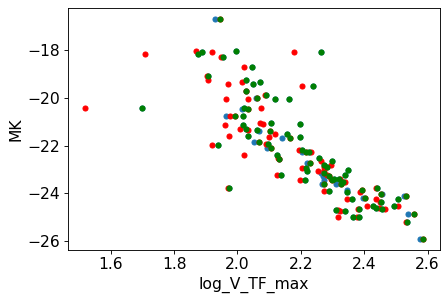

In [46]:
ax=TullyData2.plot.scatter(x="log_V_RC_Max", y="MK" )
TullyData2.plot.scatter(x="log_V_Model_R25", y="MK" , color="red", ax=ax)
TullyData2.plot.scatter(x="log_V_TF_max", y="MK" , color="green", ax=ax)

<AxesSubplot:xlabel='log_V_TF_max', ylabel='MK'>

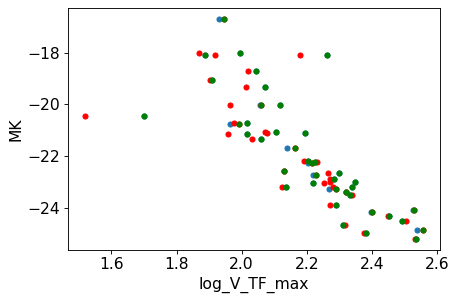

In [47]:
ax=TullyData1.plot.scatter(x="log_V_RC_Max", y="MK" )
TullyData1.plot.scatter(x="log_V_Model_R25", y="MK" , color="red", ax=ax)
TullyData1.plot.scatter(x="log_V_TF_max", y="MK" , color="green", ax=ax)

<AxesSubplot:xlabel='log_V_TF_max', ylabel='MH'>

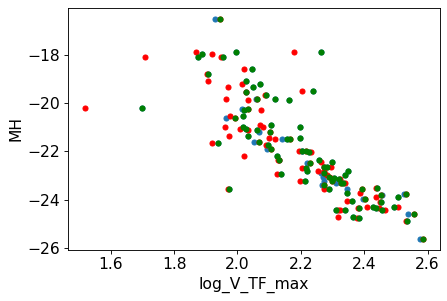

In [48]:
ax=TullyData2.plot.scatter(x="log_V_RC_Max", y="MH" )
TullyData2.plot.scatter(x="log_V_Model_R25", y="MH" , color="red", ax=ax)
TullyData2.plot.scatter(x="log_V_TF_max", y="MH" , color="green", ax=ax)

<AxesSubplot:xlabel='log_V_TF_max', ylabel='log_MB_and_J'>

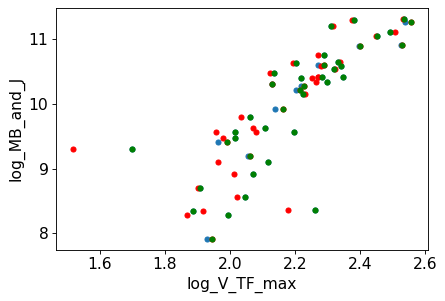

In [49]:
ax=TullyData1.plot.scatter(x="log_V_RC_Max", y='log_MB_and_J' )
TullyData1.plot.scatter(x="log_V_Model_R25", y='log_MB_and_J' , color="red", ax=ax)
TullyData1.plot.scatter(x="log_V_TF_max", y='log_MB_and_J' , color="green", ax=ax)

In [50]:
TullyData1.columns

Index(['UGC', 'Radius', 'B_V', 'gamma_B_and_J', 'gamma_BE', 'gamma_PO',
       'log_MB_and_J', 'log_M_BE', 'log_M_PO', 'log_M_gas', 'log_M_bar', 'MH',
       'MK', 'V_RC_Max', 'V_Model_R25', 'V_TF_max', 'Flag', 'log_V_RC_Max',
       'log_V_Model_R25', 'log_V_TF_max'],
      dtype='object')

In [51]:

import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
X=TullyData1['log_V_TF_max'].values.reshape(-1, 1)
Y=TullyData1['log_M_bar'].values.reshape(-1, 1)


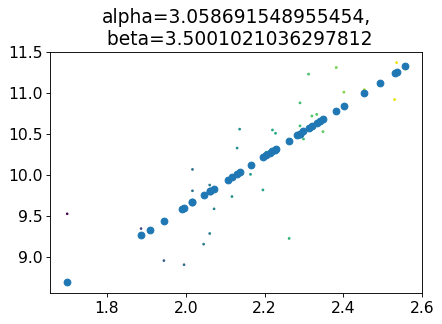

In [52]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
linear_regressor.coef_, linear_regressor.intercept_
plt.scatter(X,Y, X,Y_pred)
plt.scatter(X,Y_pred)
plt.title ("alpha={},\n beta={}".format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0]))
plt.show()

In [53]:
linear_regressor.coef_[0][0], linear_regressor.intercept_[0]

(3.058691548955454, 3.5001021036297812)

In [59]:
import astroquery
from astroquery.simbad import Simbad

In [60]:
result_table = Simbad.query_object("m1")

In [61]:
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 1,05 34 31.94,+22 00 52.2,6,6,--,--,0,C,R,2011A&A...533A..10L,1


In [62]:
s = Simbad()
# bibcodelist(date1-date2) lists the number of bibliography
# items referring to each object over that date range
s.add_votable_fields('bibcodelist(2003-2013)', "z_value")
r = s.query_object('m31')
r.pprint()

MAIN_ID      RA          DEC      ...  Z_VALUE   SCRIPT_NUMBER_ID
          "h:m:s"      "d:m:s"    ...                            
------- ------------ ------------ ... ---------- ----------------
  M  31 00 42 44.330 +41 16 07.50 ... -0.0010000                1


In [63]:
s.query_object('ugc7831')

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,BIBLIST_2003_2013,Z_VALUE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32,float64,int32
NGC 4605,12 39 59.381,+61 36 33.09,7,7,--,--,0,C,I,2006AJ....131.1163S,96,0.0004840,1


In [64]:
from astroquery.ipac.ned import Ned
result_table = Ned.get_table("ugc 7831", table='positions')
print(result_table)

No.       RA       ... Published Frequence Mode         Qualifiers       
                   ...                                                   
--- -------------- ... ------------------------ -------------------------
  0   12h39m59.38s ...                                                   
  1 12h39m59.4000s ...                                   Uncertain origin
  2 12h39m59.3801s ...                                   Uncertain origin
  3 12h39m59.3801s ...                                   Uncertain origin
  4 12h39m59.2896s ...                                   Uncertain origin
  5 12h39m59.3800s ...                                   Uncertain origin
  6 12h39m59.4000s ...                                   Uncertain origin
  7 12h39m59.2850s ...                                   Uncertain origin
  8 12h39m59.4000s ...                                   Uncertain origin
  9 12h39m59.3798s ...                                   Uncertain origin
...            ... ...                

In [65]:
result_table['No.','RA','DEC','Frequency']

No.,RA,DEC,Frequency
int32,object,object,object
0,12h39m59.38s,+61d36m33.1s,
1,12h39m59.4000s,+61d36m32.508s,
2,12h39m59.3801s,+61d36m33.098s,
3,12h39m59.3801s,+61d36m33.098s,
4,12h39m59.2896s,+61d36m32.886s,
5,12h39m59.3800s,+61d36m33.000s,
6,12h39m59.4000s,+61d36m32.000s,
7,12h39m59.2850s,+61d36m32.940s,
8,12h39m59.4000s,+61d36m33.000s,


In [66]:
SaggitariusAMass = 4.1E6*cc.M_sun
SaggitariusARadius  = (3/4/np.pi*(SaggitariusAMass/dbh)**(1/3))
SaggitariusARadius.to(uu.km)
# Black Hole Density = 5.8E18 kg/m3
# SaggitariusARadius = 267 km

<Quantity 267.23970536 km>

In [67]:
# Correction to G, mu0 and epsilon0
# Earth Velocity with respect to the CMB = 369.82 km/s

In [68]:
v= 369.82 * uu.km/uu.s
coef = (1-v**2/cc.c**2)
G0 = cc.G/coef; G0, coef

(<Quantity 6.67431016e-11 m3 / (kg s2)>, <Quantity 0.99999848>)

In [69]:
mu0 = cc.mu0/coef ; mu0

<Quantity 1.25663897e-06 N / A2>

In [70]:
epsilon0 = cc.eps0*coef; print(epsilon0.value,cc.eps0.value)

8.854174339061554e-12 8.8541878128e-12
